## **WEEK 6 EXERCISES - 2-Level Factorials Designs**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

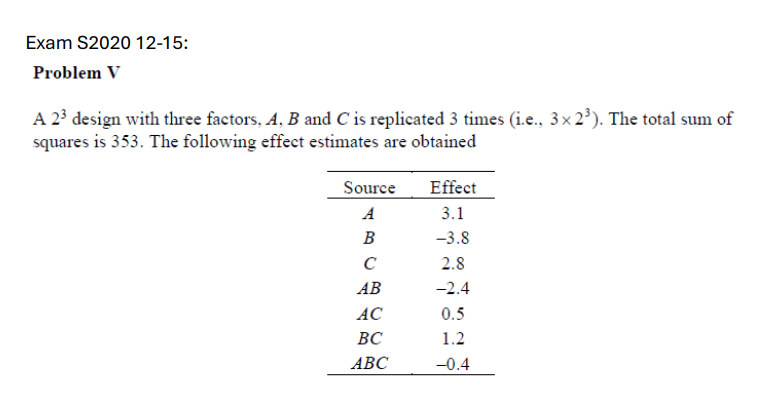

## Q1:
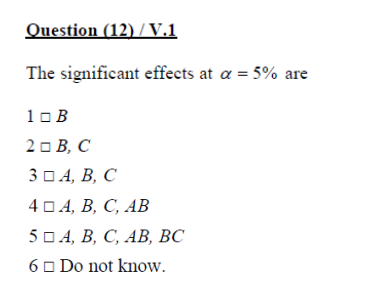

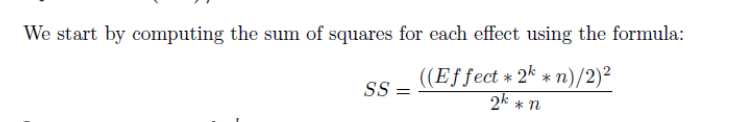

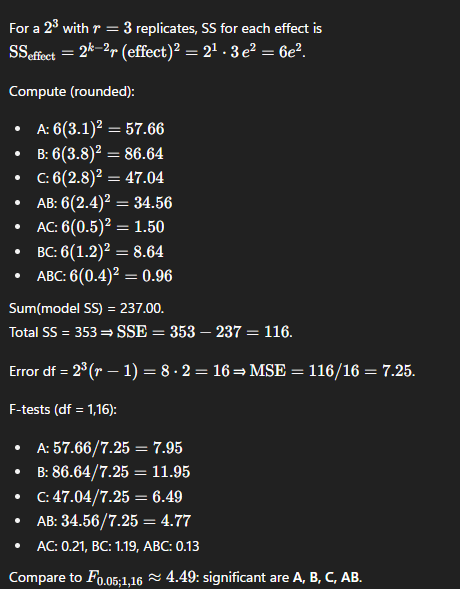

In [ ]:
import numpy as np
from scipy.stats import f


effects = {
    "A": 3.1,
    "B": -3.8,
    "C": 2.8,
    "AB": -2.4,
    "AC": 0.5,
    "BC": 1.2,
    "ABC": -0.4
}

# Constants
r = 3        # replicates
k = 3        # number of factors
SS_total = 353

# Compute sum of squares for each effect: r * 2^(k-2) * effect^2
SS_effects = {name: r * 2**(k-2) * eff**2 for name, eff in effects.items()}

# Compute residual SS
SS_model = sum(SS_effects.values())
SS_error = SS_total - SS_model

# Degrees of freedom
df_total = r * 2**k - 1
df_model = len(effects)
df_error = df_total - df_model

# Mean square error
MSE = SS_error / df_error

# Compute F-values
F_values = {name: SS / MSE for name, SS in SS_effects.items()}

# Critical F at alpha = 0.05
alpha = 0.05
F_crit = f.ppf(1 - alpha, 1, df_error)

# Significant effects
significant = [name for name, Fv in F_values.items() if Fv > F_crit]

# Show results
print("Sum of Squares:", SS_effects)
print("Residual SS:", SS_error)
print("MSE:", MSE)
print("Critical F:", F_crit)
print("F-values:", F_values)
print("Significant effects at 5%:", significant)


Sum of Squares: {'A': 57.66000000000001, 'B': 86.64, 'C': 47.03999999999999, 'AB': 34.56, 'AC': 1.5, 'BC': 8.64, 'ABC': 0.9600000000000002}
Residual SS: 116.0
MSE: 7.25
Critical F: 4.493998477666352
F-values: {'A': 7.953103448275863, 'B': 11.950344827586207, 'C': 6.4882758620689645, 'AB': 4.766896551724138, 'AC': 0.20689655172413793, 'BC': 1.1917241379310346, 'ABC': 0.1324137931034483}
Significant effects at 5%: ['A', 'B', 'C', 'AB']


##  Q2:
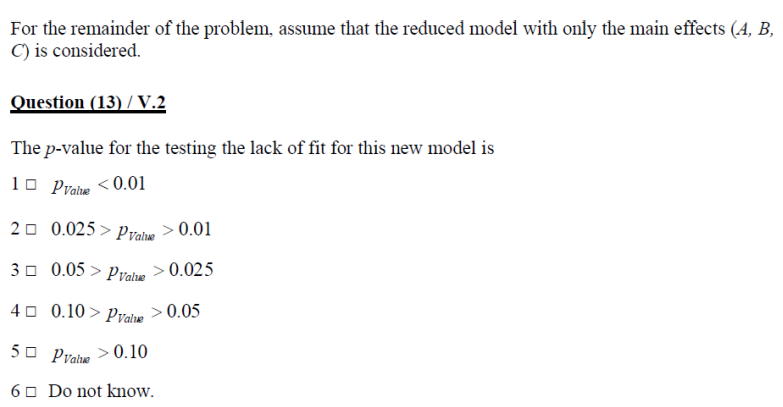

In [3]:
from scipy.stats import f

# Given values
r = 3
SS_total = 353
df_total = r * 2**3 - 1  # 24 - 1 = 23

# Sum of squares (from before)
SSA, SSB, SSC = 57.66, 86.64, 47.04
SSAB, SSAC, SSBC, SSABC = 34.56, 1.50, 8.64, 0.96
SS_full_error = 116
df_full_error = 16

# Reduced model with only A, B, C
SS_reduced_model = SSA + SSB + SSC
SS_reduced_error = SS_total - SS_reduced_model
df_reduced_error = df_total - 3  # intercept + 3 main effects

# Lack of fit F-test
num = (SS_reduced_error - SS_full_error) / (df_reduced_error - df_full_error)
den = SS_full_error / df_full_error
F_value = num / den

# p-value
p_value = 1 - f.cdf(F_value, df_reduced_error - df_full_error, df_full_error)

print("F =", F_value)
print("p-value =", p_value)


F = 1.5744827586206895
p-value = 0.22908777318817442


## Q3:
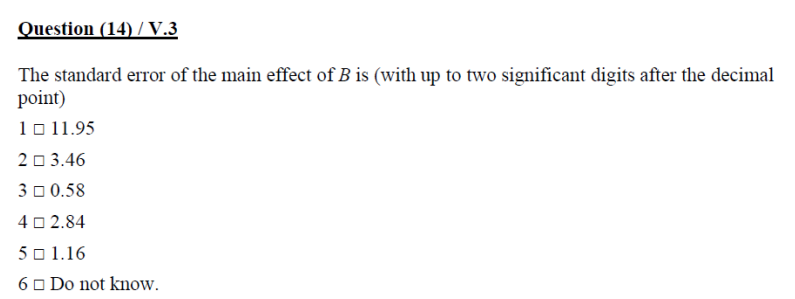

In [4]:
# Given
r = 3; k = 3; SS_total = 353
SSA, SSB, SSC, SSAB, SSAC, SSBC, SSABC = 57.66, 86.64, 47.04, 34.56, 1.50, 8.64, 0.96

# --- Q14: SE of main effect B (use reduced model with only A,B,C) ---
df_total = r*2**k - 1            # 23
SS_reduced_model = SSA + SSB + SSC
SS_reduced_error = SS_total - SS_reduced_model   # 161.66
df_reduced_error = df_total - 3   # 20
MSE_reduced = SS_reduced_error / df_reduced_error

SE_B = (MSE_reduced/6)**0.5       # since n+ = n- = r*2^(k-1) = 12 → SE = sqrt(MSE*(1/12+1/12)) = sqrt(MSE/6)
print("Q14 SE(B) =", round(SE_B, 2))  # -> 1.16



Q14 SE(B) = 1.16


## Q4:
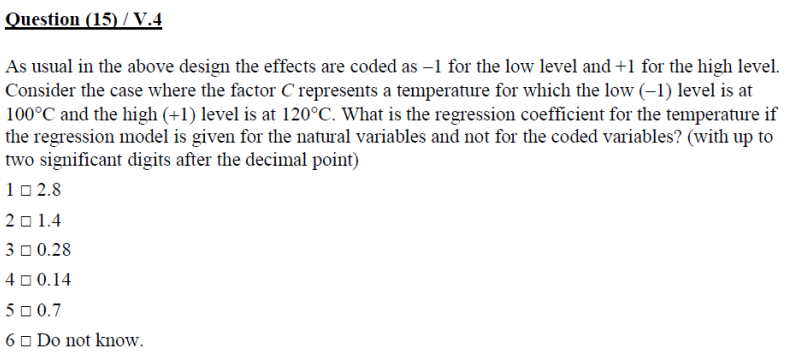

In [5]:
# --- Q15: Coefficient for temperature in natural units (C: 100°C to 120°C) ---
effect_C = 2.8
b_coded = effect_C / 2            # 1.4
half_range = (120 - 100)/2        # 10
b_natural = b_coded / half_range  # 0.14 per °C
print("Q15 beta_T =", round(b_natural, 2))  # -> 0.14


Q15 beta_T = 0.14
